## SENTIMENT ANALYSIS IN PYTHON
We will use two different techniques to do Sentiment Analysis one is old VADER and one is new adv Roberta


In [2]:
!pip install nltk==3.8.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
plt.style.use('ggplot')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.2
    Uninstalling nltk-3.9.2:
      Successfully uninstalled nltk-3.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.8.1 which is incompatible.


In [3]:
# Reading Data from the input direectory ../
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df['Text'][0]


'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
df.shape

(568454, 10)

In [7]:
#changed the shape of the df by shortening its no. of rows
df = df.head(500)
print(df.shape)

(500, 10)


## EDA 

In [8]:
df['Score'].value_counts().sort_index()

Score
1     36
2     18
3     37
4     70
5    339
Name: count, dtype: int64

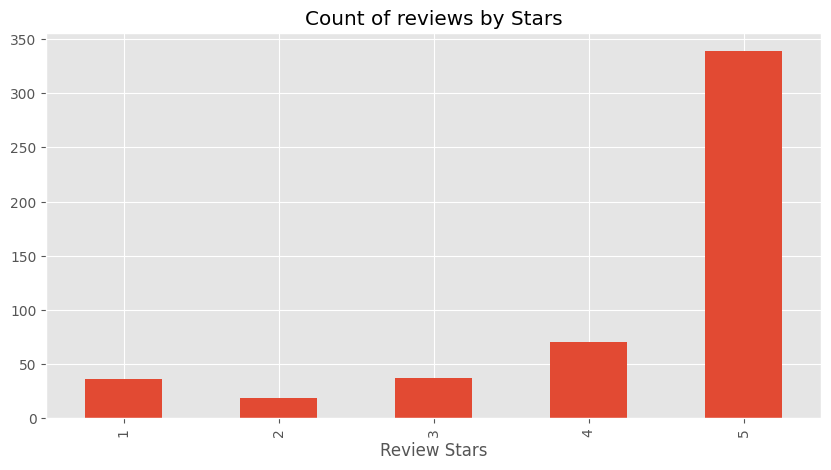

In [9]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of reviews by Stars', figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()
# We can see most of the reviews are 5 stars
# they are mostyly biased towards positive review

## BAsic NLTK Review

In [10]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [11]:
example_text = df['Text'][50]
print(example_text)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [12]:
tokens = nltk.word_tokenize(example_text)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [13]:
#Finding Part of speech 
# NN- noun
#Dt - determiner
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [14]:

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## VADER (Vakence Aware Dictionary and Sentiment Reasoner) - Bag of words approach

Take all the words in sentence and combines how much the words are positive and negative and says finally is its postive or negative sentiment sentence

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer() #object for sentiment analyzer

In [16]:
sia.polarity_scores('I am disgusted by myself')
#compund value -1 to +1 tells how negaive or postive it is it combines +ve and -ve scores both

{'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5267}

In [17]:
#Running on all the texts on the dataset to get all the polarity scores
result={}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text=row['Text']
    myid=row['Id']
    result[myid]=sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
# We change the normal dictionary to a panda dictionary to make it beautiful and also rever se by using T

vaders = pd.DataFrame(result).T

In [19]:
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df,how='left')


In [20]:
# We have sentiment score and meta data in one datagframe
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Some graphs for VADER

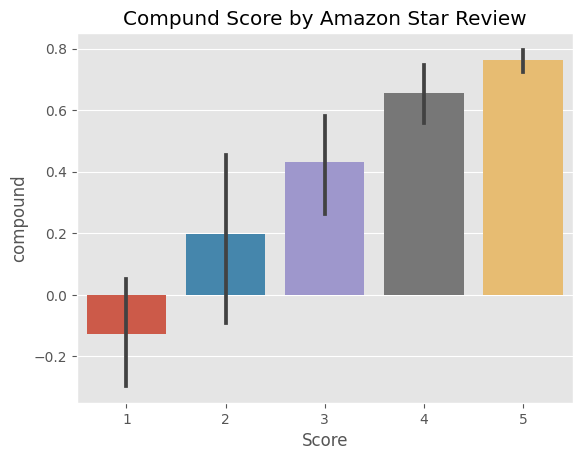

In [21]:
ax=sns.barplot(data=vaders, x='Score',y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

<Axes: xlabel='Score', ylabel='pos'>

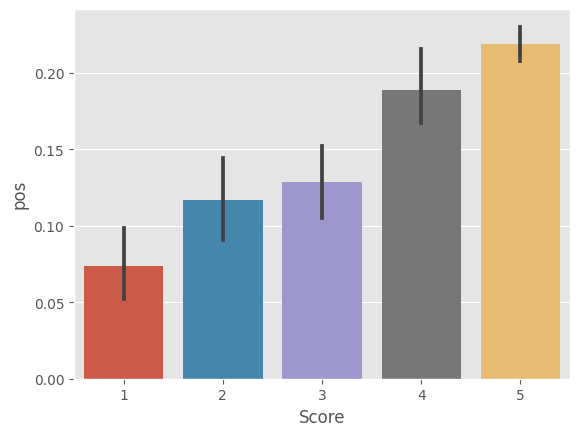

In [22]:
sns.barplot(data=vaders, x='Score',y='pos')

<Axes: xlabel='Score', ylabel='neg'>

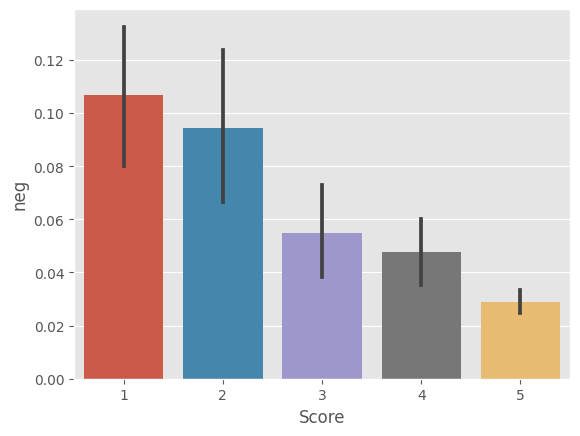

In [23]:
sns.barplot(data=vaders, x='Score',y='neg')

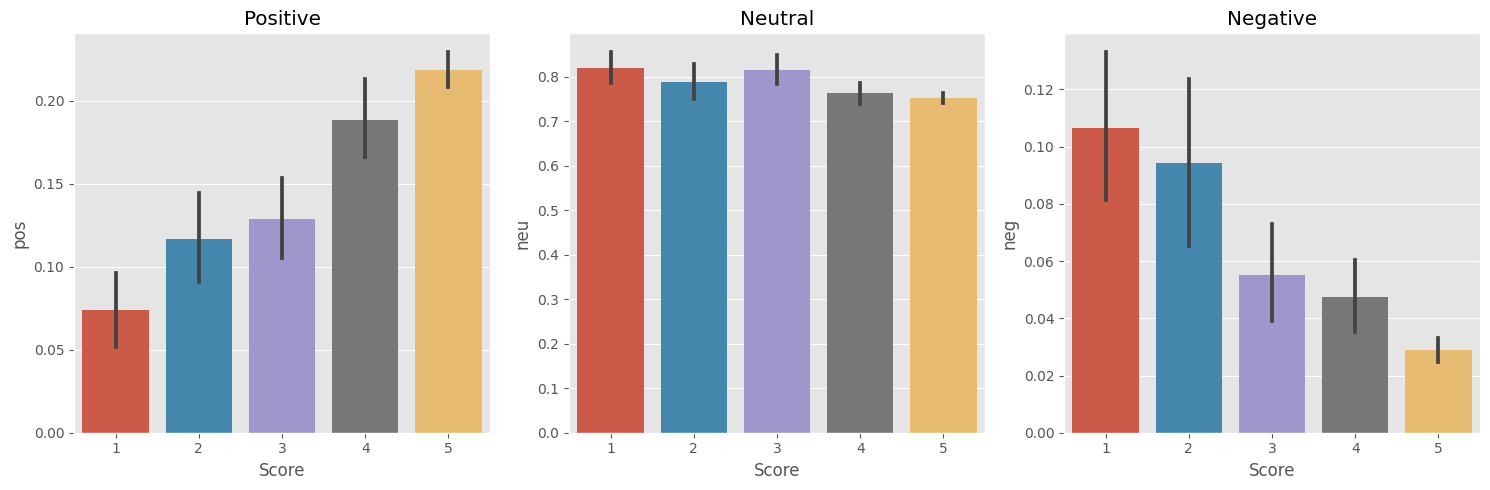

In [24]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders,x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders,x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders,x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

VADER model dosent know context /relationship between other words. VADER dosent pickup all this things but transformer model pick up such things

In [25]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [26]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

2025-11-13 13:34:30.507096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763040870.716879      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763040870.772932      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [27]:
print(example_text)
sia.polarity_scores(text)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.9811}

In [28]:

encoded_text=tokenizer(example_text, return_tensors='pt')

In [38]:
output = model(**encoded_text) 
scores = output[0][0].detach().numpy()
scores= softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}


In [30]:
# Rinning on whole dataset now
def polarity_scores_roberta(example):
    output = model(**encoded_text) 
    scores = output[0][0].detach().numpy()
    scores= softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    print(scores_dict)
    

In [31]:
from tqdm import tqdm

result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    myid = row['Id']
    text = row['Text']
    try:
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {f"vader_{k}": v for k, v in vader_result.items()}

        roberta_result = polarity_scores_roberta(text)
        if not isinstance(roberta_result, dict):
            # defensive fallback
            roberta_result = {}

        both = {**vader_result_rename, **roberta_result}
        result[myid] = both

    except Exception as e:
        print(f"Unexpected error for id {myid}: {e}")
        result[myid] = {**vader_result_rename, **{}}



  0%|          | 2/500 [00:00<00:40, 12.45it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  1%|          | 4/500 [00:00<00:42, 11.68it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  1%|          | 6/500 [00:00<01:05,  7.58it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  1%|▏         | 7/500 [00:00<01:12,  6.79it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  2%|▏         | 8/500 [00:01<01:16,  6.44it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  2%|▏         | 10/500 [00:01<01:24,  5.83it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  2%|▏         | 12/500 [00:01<01:21,  6.00it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  3%|▎         | 14/500 [00:02<01:09,  6.95it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  3%|▎         | 16/500 [00:02<01:03,  7.61it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  4%|▍         | 19/500 [00:02<00:49,  9.64it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  4%|▍         | 21/500 [00:02<00:44, 10.84it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  5%|▌         | 25/500 [00:03<00:39, 12.13it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  5%|▌         | 27/500 [00:03<00:37, 12.51it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  6%|▌         | 31/500 [00:03<00:36, 12.78it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  7%|▋         | 33/500 [00:03<00:37, 12.60it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  7%|▋         | 37/500 [00:03<00:35, 12.88it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  8%|▊         | 39/500 [00:04<00:35, 13.10it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  9%|▊         | 43/500 [00:04<00:34, 13.25it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



  9%|▉         | 45/500 [00:04<00:34, 13.27it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 10%|▉         | 49/500 [00:04<00:33, 13.43it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 10%|█         | 51/500 [00:04<00:33, 13.46it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 11%|█         | 55/500 [00:05<00:32, 13.52it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 11%|█▏        | 57/500 [00:05<00:32, 13.43it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 12%|█▏        | 61/500 [00:05<00:32, 13.31it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 13%|█▎        | 63/500 [00:05<00:32, 13.39it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 13%|█▎        | 67/500 [00:06<00:32, 13.41it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 14%|█▍        | 69/500 [00:06<00:31, 13.50it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 15%|█▍        | 73/500 [00:06<00:31, 13.53it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 15%|█▌        | 75/500 [00:06<00:31, 13.58it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 16%|█▌        | 79/500 [00:07<00:30, 13.71it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 16%|█▌        | 81/500 [00:07<00:30, 13.76it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 17%|█▋        | 85/500 [00:07<00:30, 13.74it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 17%|█▋        | 87/500 [00:07<00:30, 13.70it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 18%|█▊        | 91/500 [00:07<00:30, 13.51it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 19%|█▊        | 93/500 [00:08<00:31, 13.08it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 19%|█▉        | 97/500 [00:08<00:31, 12.66it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 20%|█▉        | 99/500 [00:08<00:31, 12.69it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 21%|██        | 103/500 [00:08<00:30, 13.15it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 21%|██        | 105/500 [00:09<00:29, 13.25it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 22%|██▏       | 109/500 [00:09<00:29, 13.30it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 22%|██▏       | 111/500 [00:09<00:29, 13.17it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 23%|██▎       | 115/500 [00:09<00:29, 13.24it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 23%|██▎       | 117/500 [00:09<00:28, 13.30it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 24%|██▍       | 121/500 [00:10<00:28, 13.08it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 25%|██▍       | 123/500 [00:10<00:28, 13.14it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 25%|██▌       | 127/500 [00:10<00:27, 13.33it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 26%|██▌       | 129/500 [00:10<00:27, 13.36it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 27%|██▋       | 133/500 [00:11<00:27, 13.52it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 27%|██▋       | 135/500 [00:11<00:27, 13.50it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 28%|██▊       | 139/500 [00:11<00:26, 13.45it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 28%|██▊       | 141/500 [00:11<00:26, 13.52it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 29%|██▉       | 145/500 [00:12<00:26, 13.44it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 29%|██▉       | 147/500 [00:12<00:26, 13.44it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 30%|███       | 151/500 [00:12<00:25, 13.57it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 31%|███       | 153/500 [00:12<00:25, 13.37it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 31%|███▏      | 157/500 [00:12<00:25, 13.51it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 32%|███▏      | 159/500 [00:13<00:25, 13.54it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 33%|███▎      | 163/500 [00:13<00:25, 13.15it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 33%|███▎      | 165/500 [00:13<00:25, 13.03it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 34%|███▍      | 169/500 [00:13<00:25, 12.94it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 34%|███▍      | 171/500 [00:14<00:25, 13.11it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 35%|███▌      | 175/500 [00:14<00:24, 13.22it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 35%|███▌      | 177/500 [00:14<00:24, 13.25it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 36%|███▌      | 181/500 [00:14<00:23, 13.31it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 37%|███▋      | 183/500 [00:14<00:23, 13.25it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 37%|███▋      | 187/500 [00:15<00:24, 12.61it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 38%|███▊      | 189/500 [00:15<00:25, 12.42it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 39%|███▊      | 193/500 [00:15<00:24, 12.75it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 39%|███▉      | 195/500 [00:15<00:23, 12.88it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 40%|███▉      | 199/500 [00:16<00:22, 13.23it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 40%|████      | 201/500 [00:16<00:22, 13.25it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 41%|████      | 205/500 [00:16<00:22, 13.18it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 41%|████▏     | 207/500 [00:16<00:22, 13.14it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 42%|████▏     | 211/500 [00:17<00:21, 13.22it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 43%|████▎     | 213/500 [00:17<00:21, 13.21it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 43%|████▎     | 217/500 [00:17<00:21, 13.13it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 44%|████▍     | 219/500 [00:17<00:21, 13.07it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 45%|████▍     | 223/500 [00:17<00:21, 12.94it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 45%|████▌     | 225/500 [00:18<00:21, 13.04it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 46%|████▌     | 229/500 [00:18<00:22, 12.08it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 46%|████▌     | 231/500 [00:18<00:21, 12.30it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 47%|████▋     | 235/500 [00:18<00:20, 12.82it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 47%|████▋     | 237/500 [00:19<00:20, 12.91it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 48%|████▊     | 241/500 [00:19<00:19, 13.12it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 49%|████▊     | 243/500 [00:19<00:19, 13.19it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 49%|████▉     | 247/500 [00:19<00:19, 13.09it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 50%|████▉     | 249/500 [00:20<00:19, 13.09it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 51%|█████     | 253/500 [00:20<00:18, 13.27it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 51%|█████     | 255/500 [00:20<00:18, 13.19it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 52%|█████▏    | 259/500 [00:20<00:18, 12.75it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 52%|█████▏    | 261/500 [00:20<00:18, 12.74it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 53%|█████▎    | 265/500 [00:21<00:18, 12.97it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 53%|█████▎    | 267/500 [00:21<00:17, 13.05it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 54%|█████▍    | 271/500 [00:21<00:17, 13.23it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 55%|█████▍    | 273/500 [00:21<00:17, 13.28it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 55%|█████▌    | 277/500 [00:22<00:16, 13.32it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 56%|█████▌    | 279/500 [00:22<00:16, 13.25it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 57%|█████▋    | 283/500 [00:22<00:16, 13.15it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 57%|█████▋    | 285/500 [00:22<00:16, 13.06it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 58%|█████▊    | 289/500 [00:23<00:16, 13.08it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 58%|█████▊    | 291/500 [00:23<00:15, 13.28it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 59%|█████▊    | 293/500 [00:23<00:16, 12.29it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 59%|█████▉    | 295/500 [00:23<00:18, 11.36it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 59%|█████▉    | 297/500 [00:23<00:18, 10.76it/s]


{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}


 60%|██████    | 301/500 [00:24<00:19, 10.34it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 61%|██████    | 303/500 [00:24<00:19,  9.98it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 61%|██████    | 305/500 [00:24<00:19,  9.82it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 61%|██████▏   | 307/500 [00:24<00:20,  9.28it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 62%|██████▏   | 309/500 [00:25<00:18, 10.14it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 63%|██████▎   | 313/500 [00:25<00:16, 11.28it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 63%|██████▎   | 315/500 [00:25<00:16, 11.45it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 64%|██████▍   | 319/500 [00:25<00:15, 11.74it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 64%|██████▍   | 321/500 [00:26<00:15, 11.91it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 65%|██████▌   | 325/500 [00:26<00:14, 12.16it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 65%|██████▌   | 327/500 [00:26<00:14, 12.08it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 66%|██████▌   | 331/500 [00:26<00:13, 12.27it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 67%|██████▋   | 333/500 [00:27<00:14, 11.88it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 67%|██████▋   | 337/500 [00:27<00:13, 12.19it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 68%|██████▊   | 339/500 [00:27<00:13, 12.27it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 69%|██████▊   | 343/500 [00:27<00:12, 12.29it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 69%|██████▉   | 345/500 [00:28<00:12, 11.99it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 70%|██████▉   | 349/500 [00:28<00:13, 11.41it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 70%|███████   | 351/500 [00:28<00:12, 11.64it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 71%|███████   | 355/500 [00:28<00:12, 11.81it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 71%|███████▏  | 357/500 [00:29<00:11, 12.26it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 72%|███████▏  | 361/500 [00:29<00:10, 12.82it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 73%|███████▎  | 363/500 [00:29<00:10, 12.95it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 73%|███████▎  | 367/500 [00:29<00:09, 13.44it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 74%|███████▍  | 369/500 [00:29<00:09, 13.40it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 75%|███████▍  | 373/500 [00:30<00:09, 13.38it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 75%|███████▌  | 375/500 [00:30<00:09, 13.39it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 76%|███████▌  | 379/500 [00:30<00:09, 13.35it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 76%|███████▌  | 381/500 [00:30<00:09, 13.21it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 77%|███████▋  | 385/500 [00:31<00:08, 13.31it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 77%|███████▋  | 387/500 [00:31<00:08, 13.38it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 78%|███████▊  | 391/500 [00:31<00:08, 13.19it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 79%|███████▊  | 393/500 [00:31<00:08, 13.18it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 79%|███████▉  | 397/500 [00:32<00:07, 13.48it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 80%|███████▉  | 399/500 [00:32<00:07, 13.57it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 81%|████████  | 403/500 [00:32<00:07, 13.65it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 81%|████████  | 405/500 [00:32<00:06, 13.58it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 82%|████████▏ | 409/500 [00:32<00:06, 13.22it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 82%|████████▏ | 411/500 [00:33<00:06, 13.32it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 83%|████████▎ | 415/500 [00:33<00:06, 13.52it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 83%|████████▎ | 417/500 [00:33<00:06, 13.43it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 84%|████████▍ | 421/500 [00:33<00:05, 13.58it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 85%|████████▍ | 423/500 [00:33<00:05, 13.63it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 85%|████████▌ | 427/500 [00:34<00:05, 13.48it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 86%|████████▌ | 429/500 [00:34<00:05, 13.38it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 87%|████████▋ | 433/500 [00:34<00:04, 13.40it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 87%|████████▋ | 435/500 [00:34<00:04, 13.33it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 88%|████████▊ | 439/500 [00:35<00:04, 13.25it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 88%|████████▊ | 441/500 [00:35<00:04, 13.27it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 89%|████████▉ | 445/500 [00:35<00:04, 13.33it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 89%|████████▉ | 447/500 [00:35<00:03, 13.45it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 90%|█████████ | 451/500 [00:36<00:03, 13.48it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 91%|█████████ | 453/500 [00:36<00:03, 13.25it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 91%|█████████▏| 457/500 [00:36<00:03, 13.13it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 92%|█████████▏| 459/500 [00:36<00:03, 13.28it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 93%|█████████▎| 463/500 [00:36<00:02, 13.40it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 93%|█████████▎| 465/500 [00:37<00:02, 13.38it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 94%|█████████▍| 469/500 [00:37<00:02, 13.35it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 94%|█████████▍| 471/500 [00:37<00:02, 13.38it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 95%|█████████▌| 475/500 [00:37<00:01, 13.21it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 95%|█████████▌| 477/500 [00:38<00:01, 13.05it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 96%|█████████▌| 481/500 [00:38<00:01, 12.55it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 97%|█████████▋| 483/500 [00:38<00:01, 12.84it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 97%|█████████▋| 487/500 [00:38<00:00, 13.12it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 98%|█████████▊| 489/500 [00:38<00:00, 13.01it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 99%|█████████▊| 493/500 [00:39<00:00, 13.12it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



 99%|█████████▉| 495/500 [00:39<00:00, 13.15it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}



100%|█████████▉| 499/500 [00:39<00:00, 13.27it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}


100%|██████████| 500/500 [00:39<00:00, 12.57it/s]

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.002957368}


In [45]:
result

{1: {'vader_neg': 0.0,
  'vader_neu': 0.695,
  'vader_pos': 0.305,
  'vader_compound': 0.9441},
 2: {'vader_neg': 0.138,
  'vader_neu': 0.862,
  'vader_pos': 0.0,
  'vader_compound': -0.5664},
 3: {'vader_neg': 0.091,
  'vader_neu': 0.754,
  'vader_pos': 0.155,
  'vader_compound': 0.8265},
 4: {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0},
 5: {'vader_neg': 0.0,
  'vader_neu': 0.552,
  'vader_pos': 0.448,
  'vader_compound': 0.9468},
 6: {'vader_neg': 0.029,
  'vader_neu': 0.809,
  'vader_pos': 0.163,
  'vader_compound': 0.883},
 7: {'vader_neg': 0.034,
  'vader_neu': 0.693,
  'vader_pos': 0.273,
  'vader_compound': 0.9346},
 8: {'vader_neg': 0.0,
  'vader_neu': 0.52,
  'vader_pos': 0.48,
  'vader_compound': 0.9487},
 9: {'vader_neg': 0.0,
  'vader_neu': 0.851,
  'vader_pos': 0.149,
  'vader_compound': 0.6369},
 10: {'vader_neg': 0.0,
  'vader_neu': 0.705,
  'vader_pos': 0.295,
  'vader_compound': 0.8313},
 11: {'vader_neg': 0.017,
  'vader_neu': 0

In [52]:
import pandas as pd
import numpy as np

# rebuild results_df from `result`
results_df = pd.DataFrame(result).T.reset_index().rename(columns={'index': 'Id'})

# merge with original df (keep df rows)
results_df = results_df.merge(df, how='right', on='Id')

# ensure roberta columns exist
for col in ['roberta_neg','roberta_neu','roberta_pos']:
    if col not in results_df.columns:
        results_df[col] = np.nan

# ensure vader columns exist (defensive)
for col in ['vader_neg','vader_neu','vader_pos','vader_compound']:
    if col not in results_df.columns:
        results_df[col] = np.nan

# final column order you wanted
cols = ['Id','vader_neg','vader_neu','vader_pos','vader_compound',
        'roberta_neg','roberta_neu','roberta_pos',
        'ProductId','UserId','ProfileName','HelpfulnessNumerator',
        'HelpfulnessDenominator','Score','Time','Summary','Text']

# keep only existing cols but in the desired order
results_df = results_df[[c for c in cols if c in results_df.columns]]

print(results_df.columns)


Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [48]:
result

{1: {'vader_neg': 0.0,
  'vader_neu': 0.695,
  'vader_pos': 0.305,
  'vader_compound': 0.9441},
 2: {'vader_neg': 0.138,
  'vader_neu': 0.862,
  'vader_pos': 0.0,
  'vader_compound': -0.5664},
 3: {'vader_neg': 0.091,
  'vader_neu': 0.754,
  'vader_pos': 0.155,
  'vader_compound': 0.8265},
 4: {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0},
 5: {'vader_neg': 0.0,
  'vader_neu': 0.552,
  'vader_pos': 0.448,
  'vader_compound': 0.9468},
 6: {'vader_neg': 0.029,
  'vader_neu': 0.809,
  'vader_pos': 0.163,
  'vader_compound': 0.883},
 7: {'vader_neg': 0.034,
  'vader_neu': 0.693,
  'vader_pos': 0.273,
  'vader_compound': 0.9346},
 8: {'vader_neg': 0.0,
  'vader_neu': 0.52,
  'vader_pos': 0.48,
  'vader_compound': 0.9487},
 9: {'vader_neg': 0.0,
  'vader_neu': 0.851,
  'vader_pos': 0.149,
  'vader_compound': 0.6369},
 10: {'vader_neg': 0.0,
  'vader_neu': 0.705,
  'vader_pos': 0.295,
  'vader_compound': 0.8313},
 11: {'vader_neg': 0.017,
  'vader_neu': 0

In [53]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Combine and compare

In [56]:
# Diagnostic checks — run these first
print("rows total:", len(results_df))
cols = ['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos','Score']
print("columns present:", [c for c in cols if c in results_df.columns])

# how many non-null per column
print(results_df[cols].notna().sum())

# show rows that WOULD be used by pairplot (after dropna)
plot_df = results_df.dropna(subset=['vader_neg','vader_neu','vader_pos',
                                    'roberta_neg','roberta_neu','roberta_pos'])
print("rows after dropna for all vader+roberta:", len(plot_df))
print("sample rows (first 5):")
print(plot_df[['Id','Score','vader_neg','vader_neu','vader_pos',
               'roberta_neg','roberta_neu','roberta_pos']].head().to_string(index=False))

# quick stats to check variance
print("\nSummary stats:")
print(plot_df[['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos']].describe())
print("\nUnique counts (vader/roberta):")
for c in ['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos','Score']:
    if c in plot_df:
        print(c, "unique:", plot_df[c].nunique())


rows total: 500
columns present: ['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'Score']
vader_neg      500
vader_neu      500
vader_pos      500
roberta_neg      0
roberta_neu      0
roberta_pos      0
Score          500
dtype: int64
rows after dropna for all vader+roberta: 0
sample rows (first 5):
Empty DataFrame
Columns: [Id, Score, vader_neg, vader_neu, vader_pos, roberta_neg, roberta_neu, roberta_pos]
Index: []

Summary stats:
       vader_neg  vader_neu  vader_pos  roberta_neg  roberta_neu  roberta_pos
count        0.0        0.0        0.0          0.0          0.0          0.0
mean         NaN        NaN        NaN          NaN          NaN          NaN
std          NaN        NaN        NaN          NaN          NaN          NaN
min          NaN        NaN        NaN          NaN          NaN          NaN
25%          NaN        NaN        NaN          NaN          NaN          NaN
50%          NaN        NaN        NaN          NaN       

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# if no rows, stop early
if plot_df.empty:
    print("No rows with complete vader+roberta scores. Recompute or fillna and retry.")
else:
    # bin Score into categories if it's numeric continuous (change bins as needed)
    if np.issubdtype(plot_df['Score'].dtype, np.number) and plot_df['Score'].nunique() > 8:
        plot_df = plot_df.copy()
        plot_df['Score_bin'] = pd.cut(plot_df['Score'], bins=5, labels=False)
        hue_col = 'Score_bin'
    else:
        hue_col = 'Score' if 'Score' in plot_df else None

    # sample for speed / clarity
    small = plot_df.sample(n=min(len(plot_df), 1000), random_state=42)

    sns.pairplot(
        data=small,
        vars=['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos'],
        hue=hue_col,
        palette='tab10',
        plot_kws={'s': 20, 'alpha': 0.6}
    )
    plt.show()


No rows with complete vader+roberta scores. Recompute or fillna and retry.


In [59]:
from pandas.plotting import scatter_matrix
cols = ['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos']
scatter_df = results_df[cols].dropna()
if scatter_df.empty:
    print("scatter_matrix: no data (all NaN)")
else:
    axes = scatter_matrix(scatter_df.sample(n=min(len(scatter_df),500), random_state=0), alpha=0.6, figsize=(8,8))
    plt.tight_layout()
    plt.show()


scatter_matrix: no data (all NaN)


In [60]:
import torch, numpy as np, pandas as pd
from tqdm import tqdm
from scipy.special import softmax

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device).eval()

def batch_roberta_scores(texts, tokenizer, model, device=device, max_length=256, batch_size=64):
    outs = []
    with torch.no_grad():
        for i in tqdm(range(0, len(texts), batch_size)):
            batch = texts[i:i+batch_size]
            enc = tokenizer(batch, truncation=True, padding=True, max_length=max_length, return_tensors="pt")
            enc = {k:v.to(device) for k,v in enc.items()}
            out = model(**enc)
            logits = out.logits if hasattr(out, "logits") else out[0]
            probs = softmax(logits.cpu().numpy(), axis=1)
            for p in probs:
                p = np.asarray(p, dtype=float)
                if p.size < 3:
                    p = np.pad(p, (0, 3-p.size), constant_values=np.nan)
                outs.append([float(p[0]), float(p[1]), float(p[2])])
    return np.array(outs)

# ---- compute for all rows (or replace df['Text'] slice with missing rows only) ----
texts = df['Text'].tolist()
roberta_vals = batch_roberta_scores(texts, tokenizer, model, device=device, max_length=256, batch_size=64)

# ---- attach to dataframe ----
roberta_df = pd.DataFrame(roberta_vals, columns=['roberta_neg','roberta_neu','roberta_pos'])
roberta_df['Id'] = df['Id'].values

# merge into results_df (creates columns if missing)
results_df = results_df.merge(roberta_df, on='Id', how='right').merge(df, how='right', on='Id')

# ensure column order you want (defensive)
cols = ['Id','vader_neg','vader_neu','vader_pos','vader_compound',
        'roberta_neg','roberta_neu','roberta_pos',
        'ProductId','UserId','ProfileName','HelpfulnessNumerator',
        'HelpfulnessDenominator','Score','Time','Summary','Text']
results_df = results_df[[c for c in cols if c in results_df.columns]]

# convert numeric
for c in ['vader_neg','vader_neu','vader_pos','vader_compound','roberta_neg','roberta_neu','roberta_pos']:
    if c in results_df: results_df[c] = pd.to_numeric(results_df[c], errors='coerce')

print("Done — rows with valid roberta:", results_df[['roberta_neg','roberta_neu','roberta_pos']].dropna().shape[0])


100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


KeyError: "None of [Index(['roberta_neg', 'roberta_neu', 'roberta_pos'], dtype='object')] are in the [columns]"

In [61]:
import pandas as pd
import numpy as np

# ---- recreate res_df (from result) ----
res_df = pd.DataFrame(result).T.reset_index().rename(columns={'index': 'Id'})

# ---- make sure you actually have roberta_df computed earlier (from your batch run) ----
# If you used the previous cell, roberta_df should exist. If not, create a quick placeholder:
try:
    _ = roberta_df
except NameError:
    # fallback: create empty roberta_df with same length as df
    roberta_df = pd.DataFrame({
        'Id': df['Id'].values,
        'roberta_neg': np.nan,
        'roberta_neu': np.nan,
        'roberta_pos': np.nan
    })

# ---- Ensure Id dtypes match to avoid silent merge issues ----
for D in (res_df, roberta_df, df):
    if D['Id'].dtype != df['Id'].dtype:
        D['Id'] = D['Id'].astype(df['Id'].dtype)

# ---- merge: start from the original df to preserve order and all rows ----
results_df = df.merge(res_df, on='Id', how='left').merge(roberta_df, on='Id', how='left')

# ---- Ensure columns exist and in the order you want ----
for col in ['vader_neg','vader_neu','vader_pos','vader_compound',
            'roberta_neg','roberta_neu','roberta_pos']:
    if col not in results_df.columns:
        results_df[col] = np.nan
# final order
cols = ['Id','vader_neg','vader_neu','vader_pos','vader_compound',
        'roberta_neg','roberta_neu','roberta_pos',
        'ProductId','UserId','ProfileName','HelpfulnessNumerator',
        'HelpfulnessDenominator','Score','Time','Summary','Text']
results_df = results_df[[c for c in cols if c in results_df.columns]]

print("Columns now:", results_df.columns.tolist())
print("Rows with valid roberta:", results_df[['roberta_neg','roberta_neu','roberta_pos']].dropna().shape[0])


Columns now: ['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']
Rows with valid roberta: 500


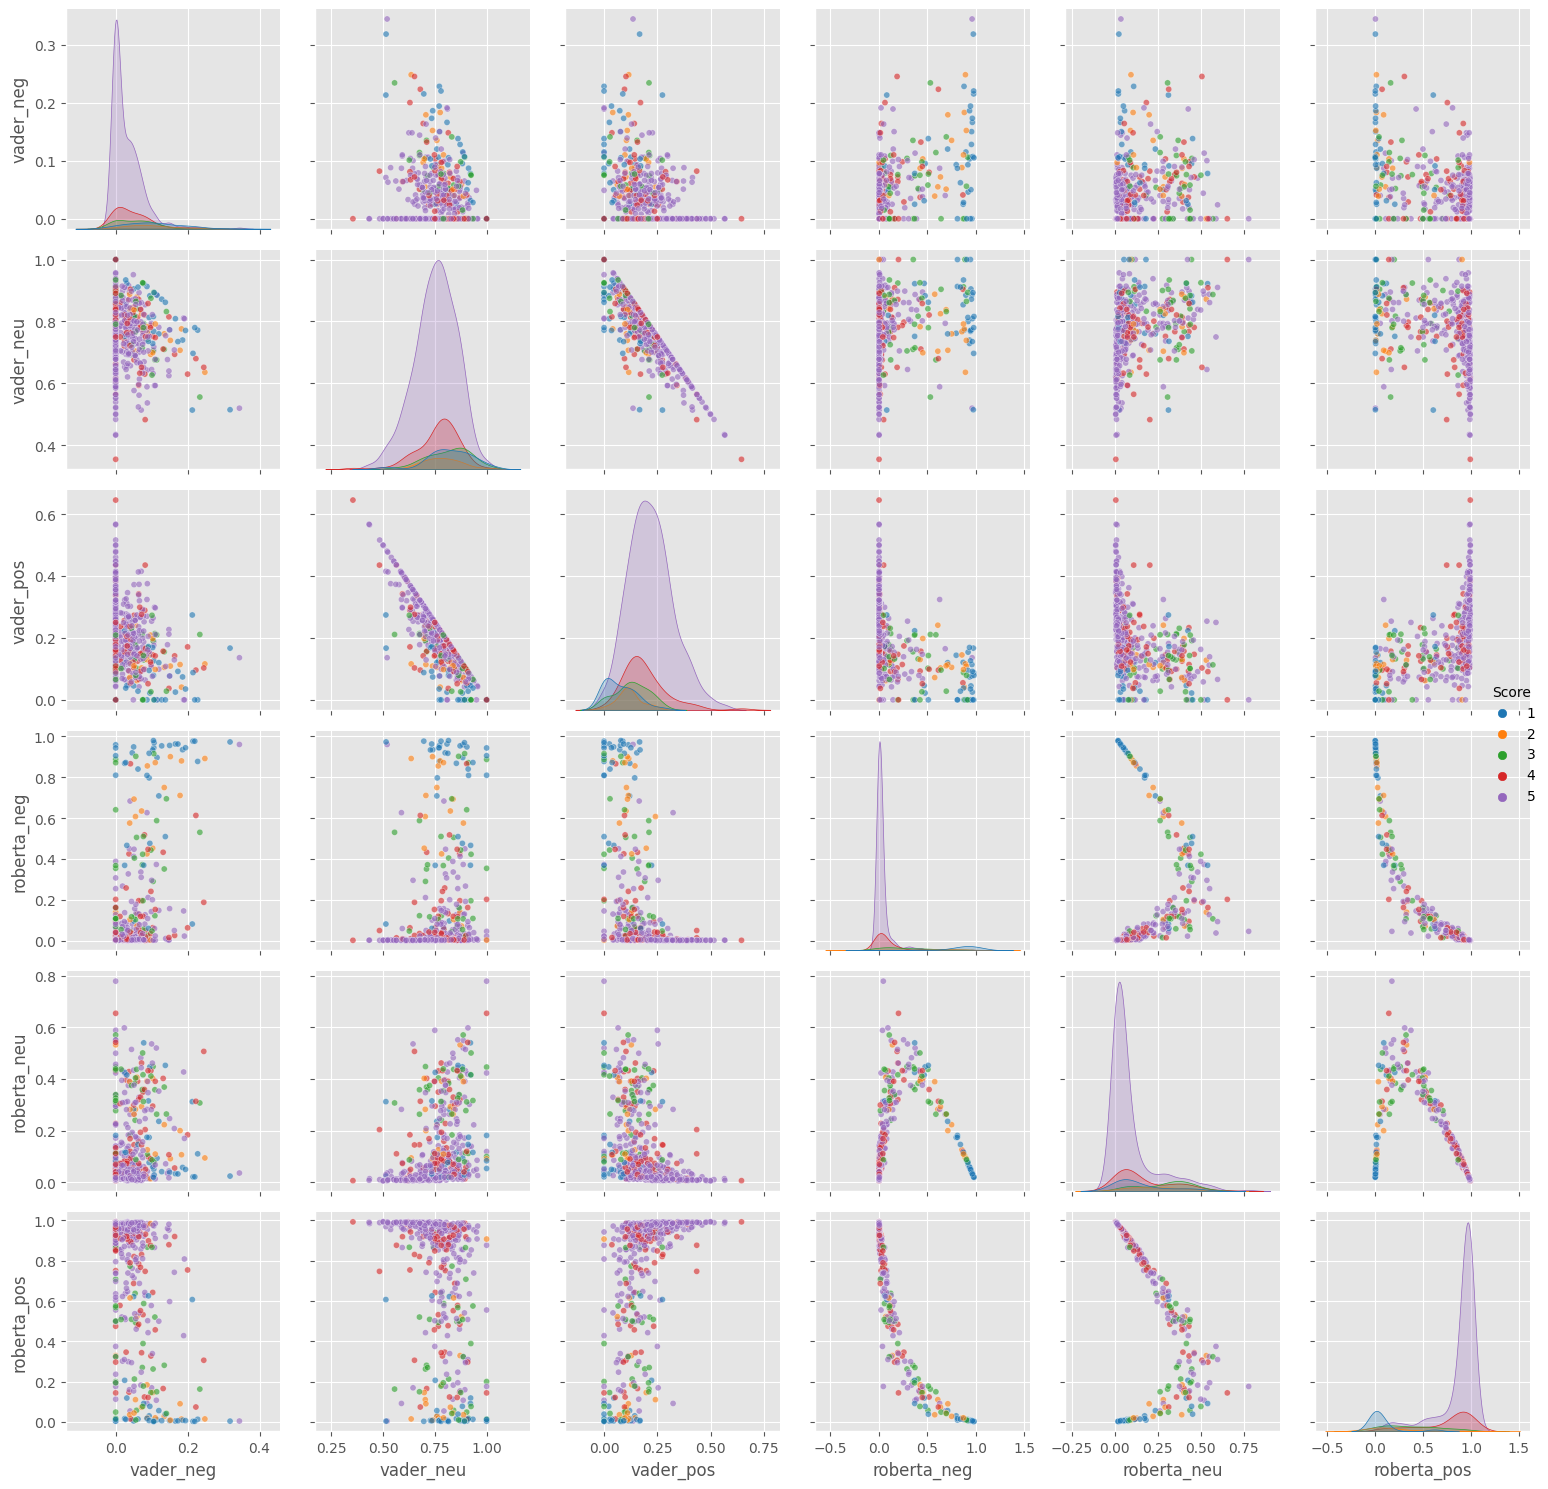

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# prepare plot_df
plot_df = results_df.dropna(subset=['vader_neg','vader_neu','vader_pos',
                                    'roberta_neg','roberta_neu','roberta_pos']).copy()

# bin Score if it's continuous with many unique values
if np.issubdtype(plot_df['Score'].dtype, np.number) and plot_df['Score'].nunique() > 8:
    plot_df['Score_bin'] = pd.cut(plot_df['Score'], bins=5, labels=False)
    hue_col = 'Score_bin'
else:
    hue_col = 'Score' if 'Score' in plot_df else None

# sample for clarity
small = plot_df.sample(n=min(len(plot_df), 1000), random_state=42)

sns.pairplot(
    data=small,
    vars=['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos'],
    hue=hue_col,
    palette='tab10',
    plot_kws={'s': 20, 'alpha': 0.6}
)
plt.tight_layout()
plt.show()


## Step 4: Review Examples:




In [63]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [64]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]


'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

# nevative sentiment 5-Star view


In [65]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [66]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## Extra: The Transformers Pipeline

In [67]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [68]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [69]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [70]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]